In [1]:
from data_tokenizing import tokenize_data
from models_CNN import run_cnn_model
from models_LSTM import run_lstm_model
from models_RL import run_lr_model
from models_decision_tree import run_tree
from data_plot import plot_data_analysis
from data_nlp import show_nlp_results, draw_n_gram
from Data_cleaning import clean_data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

2023-06-09 16:10:04.796942: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/daniel.chancir/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/daniel.chancir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/daniel.chancir/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


================================Dataframe después de eliminar valores duplicados================================
sentiment
positive    24884
negative    24698
Name: count, dtype: int64
                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


/Users/daniel.chancir/Documents/GitHub/aprendizaje_maquinas/Data_cleaning.py:45: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


======================== NUBE DE PALABRAS =================================


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniel.chancir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


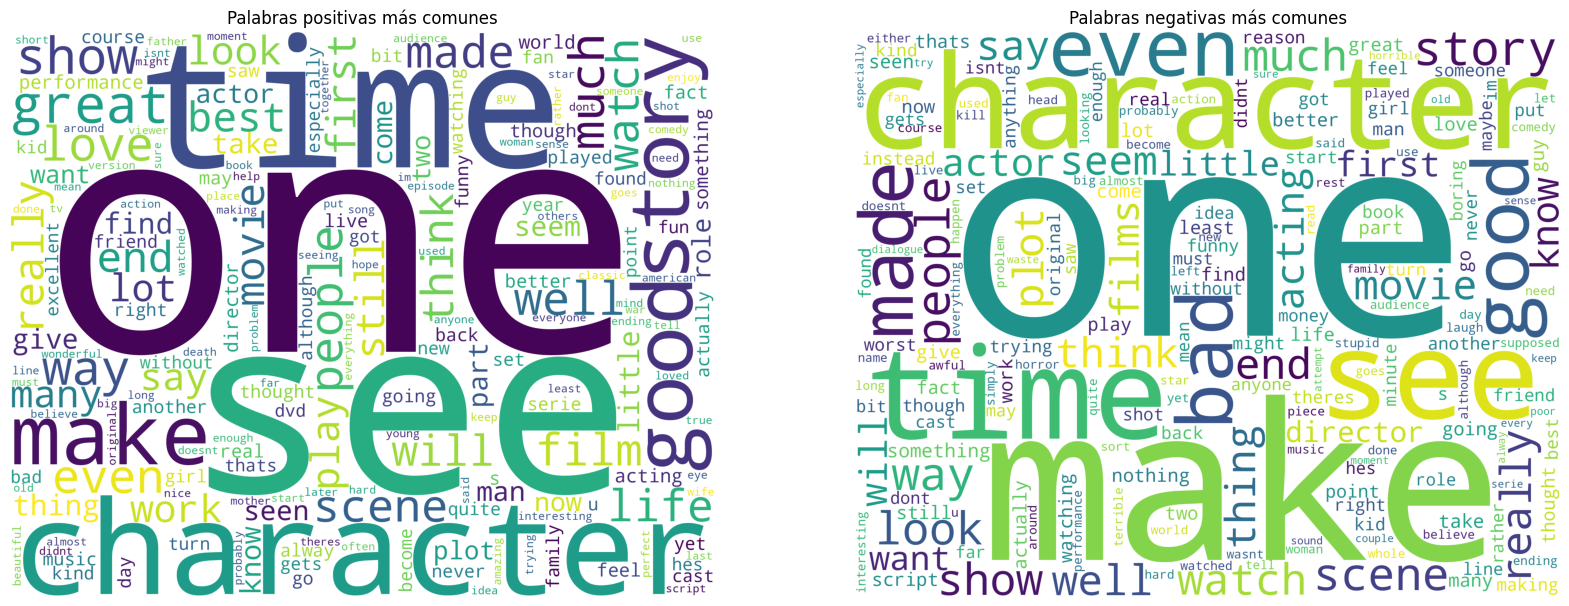

In [2]:
#Limpieza del dataset y análisis inicial
imdb_df = clean_data()

plot_data_analysis(imdb_df)

In [3]:
#Lematización de las reseñas
processed_imdb_df = show_nlp_results(imdb_df)

Antes de preprocesar reviews... 
 i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point  risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends
Después de preprocesar reviews...
 i think this be a wonderful way to spend time on a too ho

In [4]:
#Análisis de Palabras más comunes en reseñas positivas y negativas
positivedata = processed_imdb_df[processed_imdb_df['sentiment'] == 1]
positivedata = positivedata['review']
negdata = processed_imdb_df[processed_imdb_df['sentiment']== 0]
negdata = negdata['review']

positive_texts = ' '.join(positivedata)
positive_strings = positive_texts.split(' ')
neg_texts = ' '.join(negdata)
neg_strings = neg_texts.split(' ')

================================================Gráfica de palabras comunes y combinaciones=====================================
================================================Palabras y combinaciones más comunes de reseñas con sentimientos positivos =================================================
       word  count
0   (film,)  48523
1  (movie,)  42929
2    (one,)  26843
3    (see,)  21185
4   (make,)  19755
5   (like,)  19292
6   (good,)  17262
7    (get,)  15922
8   (time,)  15192
9  (great,)  13973


<Axes: title={'center': 'Palabras más comunes de reseñas con sentimientos positivos'}, xlabel='count', ylabel='word'>

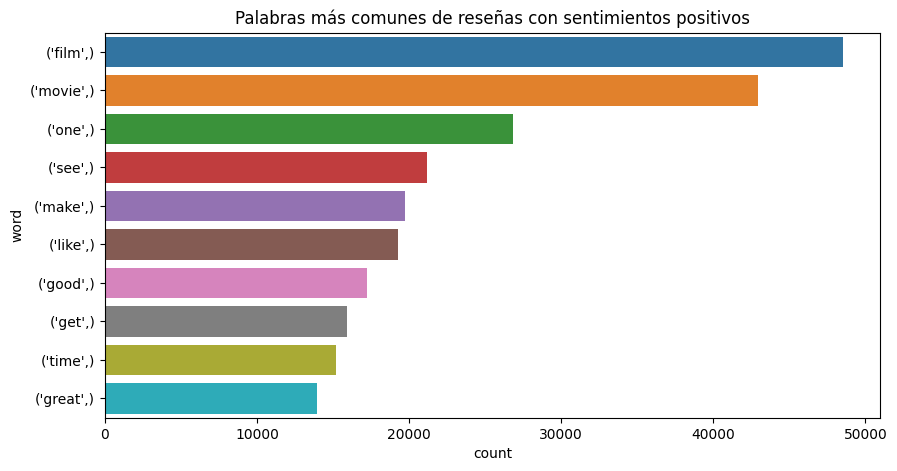

In [5]:
print('================================================Gráfica de palabras comunes y combinaciones=====================================')
print('================================================Palabras y combinaciones más comunes de reseñas con sentimientos positivos =================================================')
draw_n_gram(positive_strings, title = 'Palabras más comunes de reseñas con sentimientos positivos')

             word  count
0     (one, best)   1608
1    (see, movie)   1364
2  (watch, movie)   1250
3      (ive, see)   1056
4     (see, film)   1039
5     (ever, see)   1024
6  (even, though)   1008
7    (look, like)    916
8   (first, time)    908
9    (dont, know)    859
                  word  count
0     (ive, ever, see)    345
1    (new, york, city)    186
2     (film, ive, see)    159
3   (one, best, movie)    156
4     (world, war, ii)    152
5   (film, ever, make)    151
6   (movie, ever, see)    142
7    (one, best, film)    142
8    (movie, ive, see)    134
9  (base, true, story)    123


<Axes: title={'center': 'Trigramas más comunes de reseñas con sentimientos positivos'}, xlabel='count', ylabel='word'>

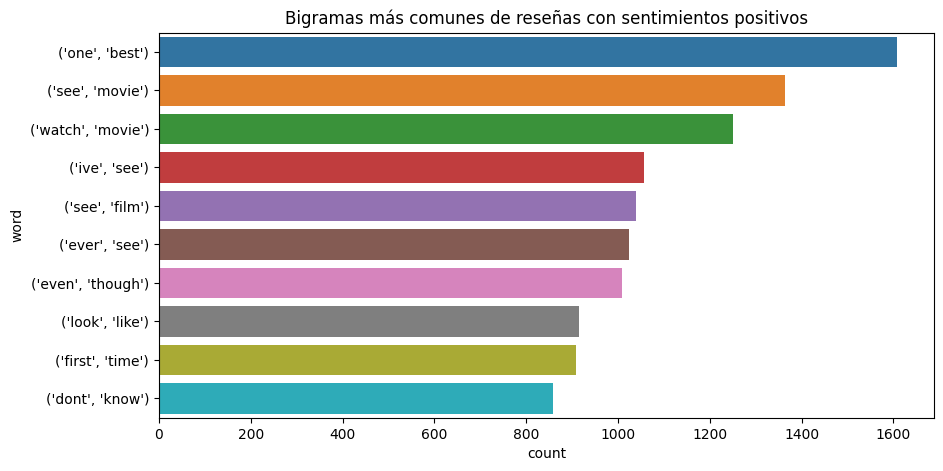

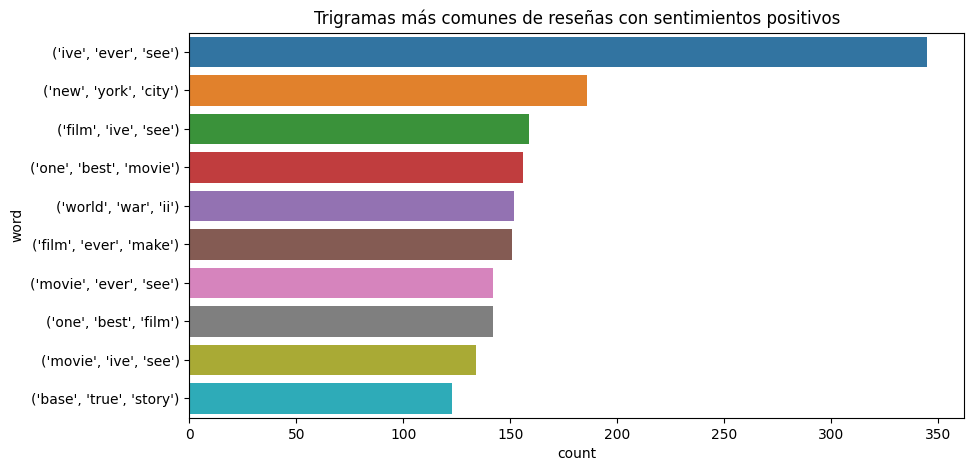

In [6]:
draw_n_gram(positive_strings, 2, 'Bigramas más comunes de reseñas con sentimientos positivos')
draw_n_gram(positive_strings, 3, 'Trigramas más comunes de reseñas con sentimientos positivos')

================================================Palabras y combinaciones más comunes de reseñas con sentimientos negativos =================================================
       word  count
0  (movie,)  55342
1   (film,)  42290
2    (one,)  25431
3   (make,)  23257
4   (like,)  23140
5    (bad,)  20604
6    (get,)  19094
7    (see,)  19080
8   (good,)  18150
9   (even,)  14812


<Axes: title={'center': 'Palabras más comunes de reseñas con sentimientos negativos'}, xlabel='count', ylabel='word'>

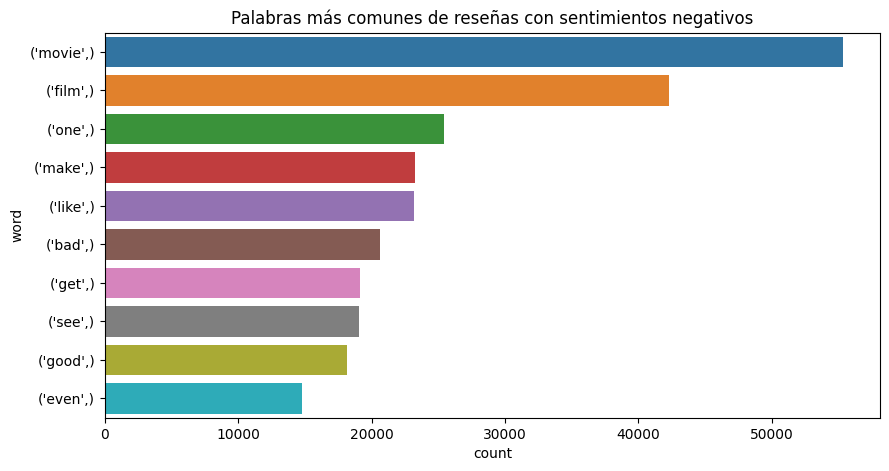

In [7]:
print('================================================Palabras y combinaciones más comunes de reseñas con sentimientos negativos =================================================')
draw_n_gram(neg_strings, title = 'Palabras más comunes de reseñas con sentimientos negativos')

                word  count
0       (look, like)   2714
1       (bad, movie)   2371
2        (ever, see)   1751
3     (watch, movie)   1711
4      (waste, time)   1559
5  (special, effect)   1406
6      (make, movie)   1335
7       (see, movie)   1260
8       (dont, know)   1177
9        (bad, film)   1124
                  word  count
0     (ive, ever, see)    635
1   (bad, movie, ever)    566
2   (movie, ever, see)    378
3    (one, bad, movie)    347
4  (dont, waste, time)    307
5   (movie, ive, ever)    270
6    (bad, film, ever)    260
7    (bad, movie, ive)    247
8  (movie, ever, make)    229
9    (film, ever, see)    191


<Axes: title={'center': 'Trigramas más comunes de reseñas con sentimientos negativos'}, xlabel='count', ylabel='word'>

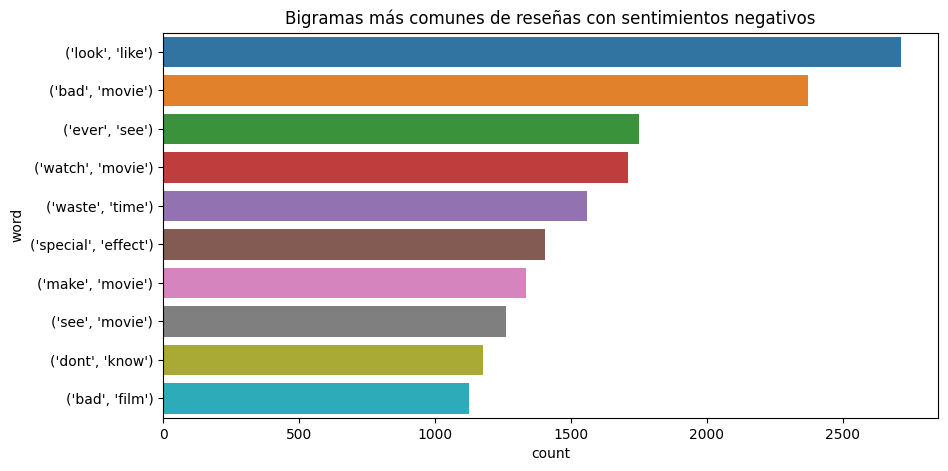

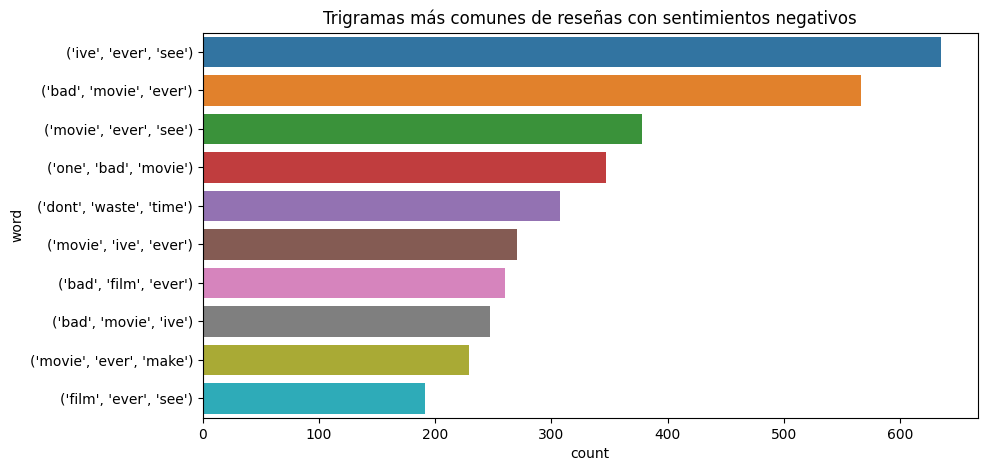

In [8]:
draw_n_gram(neg_strings, 2, 'Bigramas más comunes de reseñas con sentimientos negativos')
draw_n_gram(neg_strings, 3, 'Trigramas más comunes de reseñas con sentimientos negativos')

In [9]:
#Separación y Tokenización
(X_train, X_test, y_train, y_test, total_words, max_seq_length) = tokenize_data(processed_imdb_df)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(len(X_train[0]), len(X_test[0]))
print(X_train[0])
print(total_words)
print(max_seq_length)

(39665, 119)
(39665, 1)
(9917, 119)
(9917, 1)
119 119
[  19    6    2    1   79 6106   13    6 7246  249    7  221 2293    1
  509    2   14    6 1015 4813 1353 5353  257  108  125   34   15   27
  245   26  149  243   10 1256    2    6  137   65 1849  193    1   65
 1499  657   28  576  283   36  568    1   79 6106   45   65  657    1
    2  125  125  109    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]
25000
119


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 119, 32)           800000    
                                                                 
 conv1d (Conv1D)             (None, 115, 64)           10304     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0

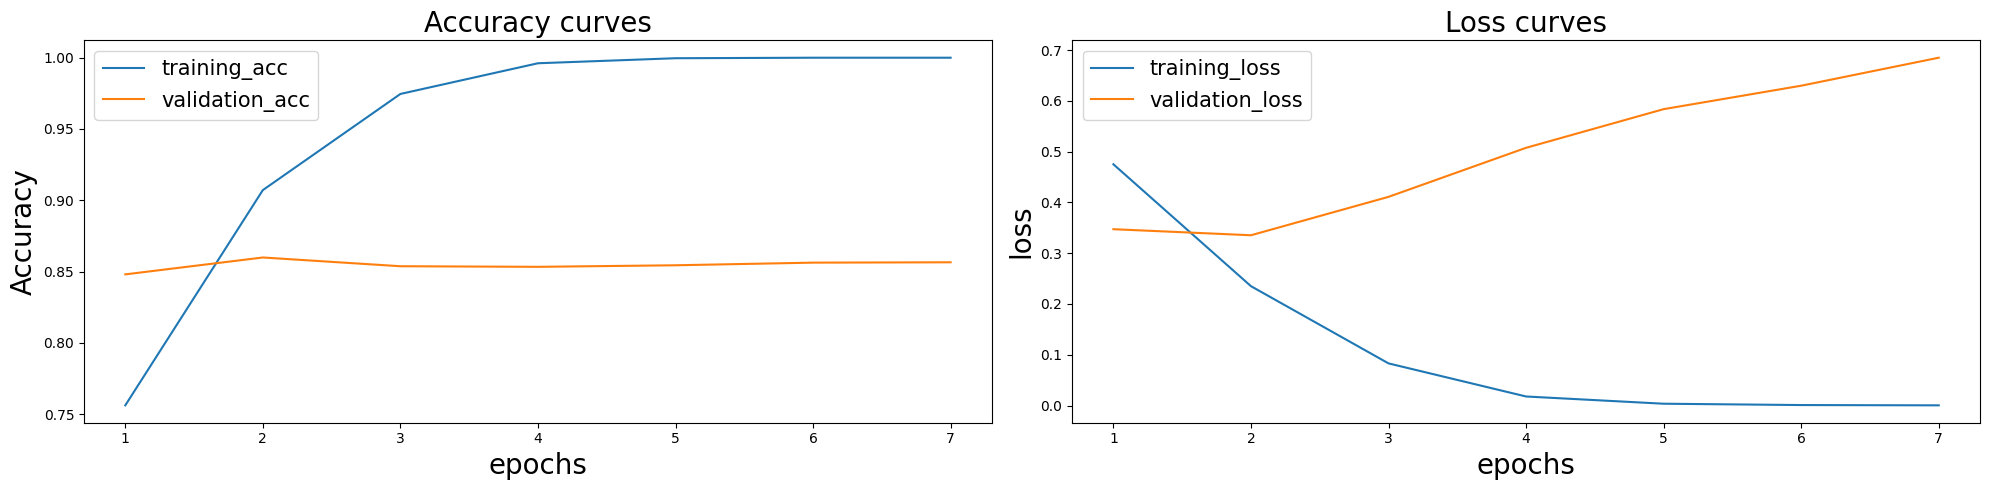

310/310 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8539
Test accuracy: 0.8538872599601746
310/310 [==============================] - 1s 2ms/step
F1 score: 0.8535919975750227
310/310 [==============================] - 1s 2ms/step


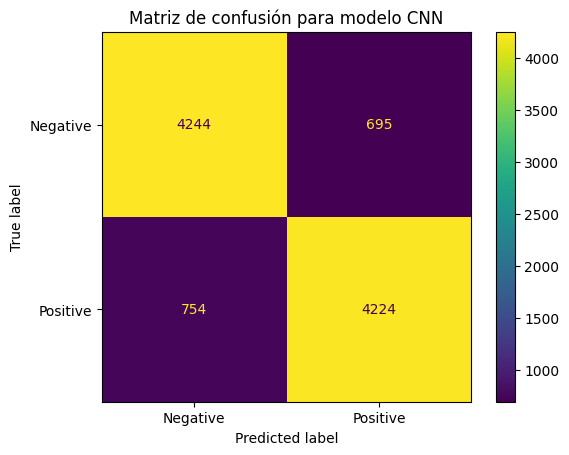

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4939
           1       0.86      0.85      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



In [10]:
#CNN
run_cnn_model(X_train, X_test, y_train, y_test, total_words, max_seq_length)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 119, 32)           800000    
                                                                 
 dropout (Dropout)           (None, 119, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 841,729
Trainable params: 841,729
Non-trai

2023-06-09 19:41:01.726711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 19:41:01.729983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 19:41:01.732630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

166/207 [=======================>......] - ETA: 2s - loss: 0.4094 - accuracy: 0.86Epoch 1/5


2023-06-09 19:41:02.468056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 19:41:02.472032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 19:41:02.475481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

205/207 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.868

2023-06-09 19:41:04.197544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 19:41:04.200423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 19:41:04.203144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1240/1240 [==============================] - 83s 63ms/step - loss: 0.5847 - accuracy: 0.6712
Epoch 2/5
1240/1240 [==============================] - 78s 63ms/step - loss: 0.3430 - accuracy: 0.8620
Epoch 3/5
1240/1240 [==============================] - 66s 54ms/step - loss: 0.2704 - accuracy: 0.8966
Epoch 4/5
1240/1240 [==============================] - 74s 60ms/step - loss: 0.2381 - accuracy: 0.9103
Epoch 5/5
1240/1240 [==============================] - 70s 56ms/step - loss: 0.2159 - accuracy: 0.9218
time for grid search = 6365 sec
Mejor Puntuación = 0.8734 usando {'batch_size': 32, 'dropout_rate': 0.75, 'epochs': 5}
Precisión promedia en validación +/- std = 0.7688 +/- 0.1252 with: {'batch_size': 32, 'dropout_rate': 0.25, 'epochs': 5}
Precisión promedia en validación +/- std = 0.8005 +/- 0.0721 with: {'batch_size': 32, 'dropout_rate': 0.25, 'epochs': 10}
Precisión promedia en validación +/- std = 0.8620 +/- 0.0024 with: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 5}
Precisión pro

2023-06-09 19:47:13.788611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 19:47:13.791269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 19:47:13.793477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-06-09 19:47:14.467048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 19:47:14.470131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 19:47:14.472189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

868/868 [==============================] - ETA: 0s - loss: 0.6946 - accuracy: 0.5094

2023-06-09 19:48:04.190266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 19:48:04.192203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 19:48:04.194166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: val_accuracy improved from -inf to 0.50773, saving model to models/LSTM.h5
868/868 [==============================] - 56s 60ms/step - loss: 0.6946 - accuracy: 0.5094 - val_loss: 0.6913 - val_accuracy: 0.5077
Epoch 2/10
867/868 [============================>.] - ETA: 0s - loss: 0.6840 - accuracy: 0.5456
Epoch 2: val_accuracy improved from 0.50773 to 0.50840, saving model to models/LSTM.h5
868/868 [==============================] - 57s 65ms/step - loss: 0.6840 - accuracy: 0.5455 - val_loss: 0.6903 - val_accuracy: 0.5084
Epoch 3/10
868/868 [==============================] - ETA: 0s - loss: 0.6618 - accuracy: 0.5753
Epoch 3: val_accuracy improved from 0.50840 to 0.61252, saving model to models/LSTM.h5
868/868 [==============================] - 57s 66ms/step - loss: 0.6618 - accuracy: 0.5753 - val_loss: 0.6346 - val_accuracy: 0.6125
Epoch 4/10
868/868 [==============================] - ETA: 0s - loss: 0.6115 - accuracy: 0.6679
Epoch 4: val_accuracy improved from 0.61252 to 0.69067

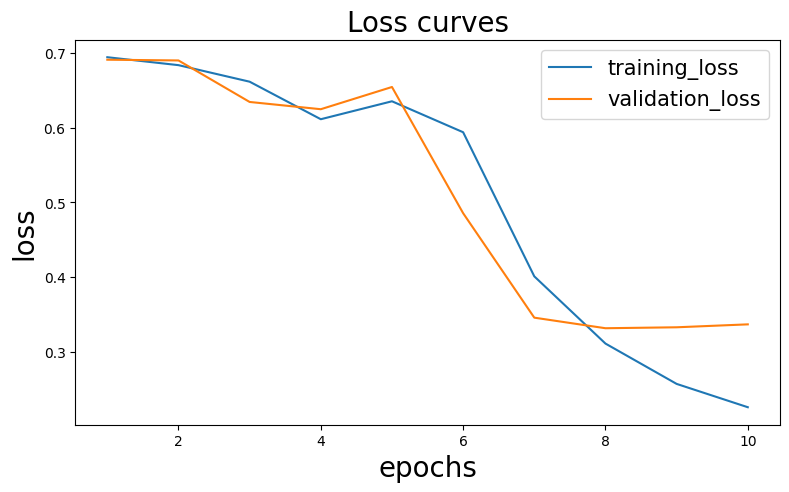

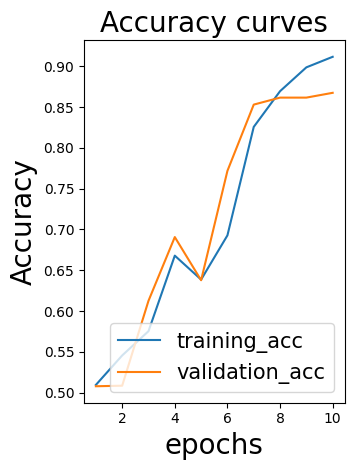

================================Testing set================================
310/310 [==============================] - 4s 12ms/step - loss: 0.3514 - accuracy: 0.8636
Precisión en el conjunto de evaluación: 0.863567590713501


2023-06-09 19:55:58.867842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 19:55:58.869576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 19:55:58.871326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

310/310 [==============================] - 4s 12ms/step
F1 score: 0.869287991498406
310/310 [==============================] - 4s 12ms/step


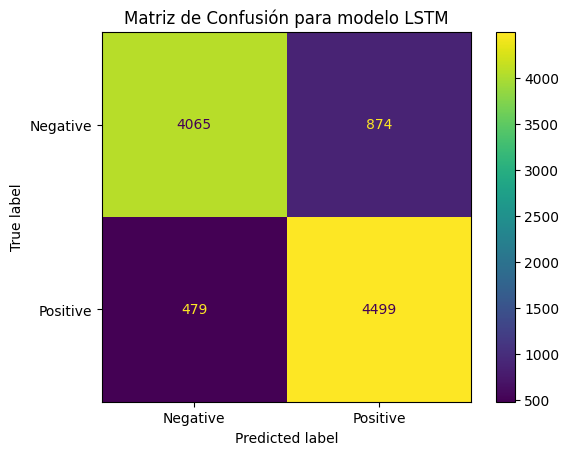

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      4939
           1       0.84      0.90      0.87      4978

    accuracy                           0.86      9917
   macro avg       0.87      0.86      0.86      9917
weighted avg       0.87      0.86      0.86      9917



In [11]:
#LSTM
run_lstm_model(X_train, X_test, y_train, y_test, total_words, max_seq_length)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score: 0.6009852216748769
Train accuracy score: 0.5222740451279465
Test accuracy score: 0.5099324392457396


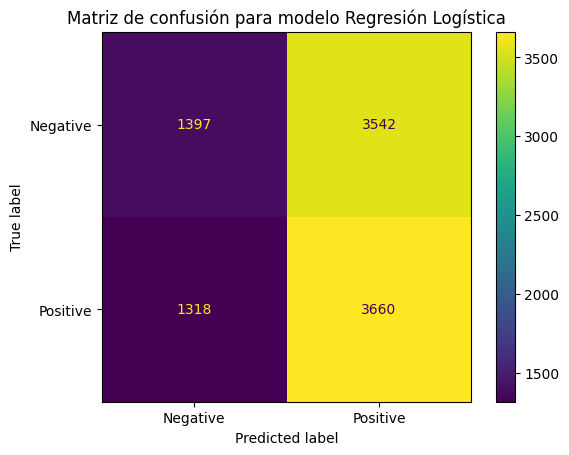

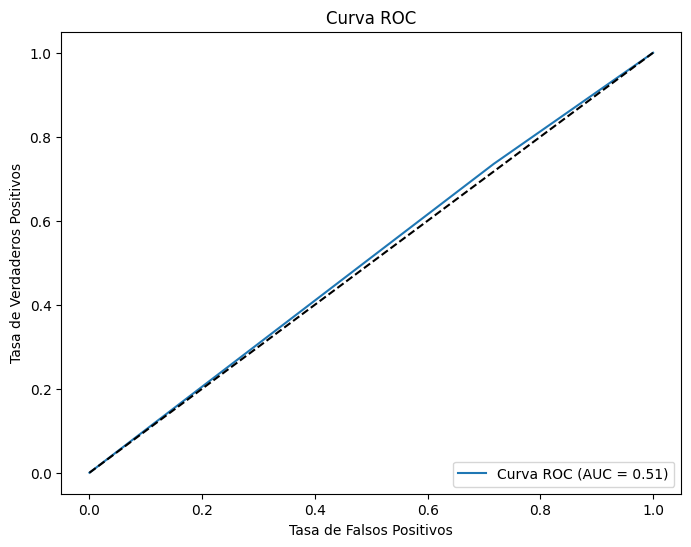

AUC: 0.5090429068301416


In [12]:
#Regresión Logística
run_lr_model(X_train, X_test, y_train, y_test)

F1 Score: 0.43295522388059704
Precisión en entrenamiento: 0.546022942140426
Precisión en evaluacuón: 0.5211253403246949


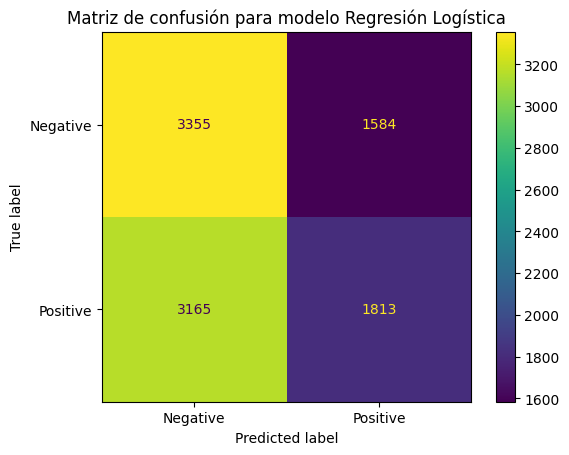

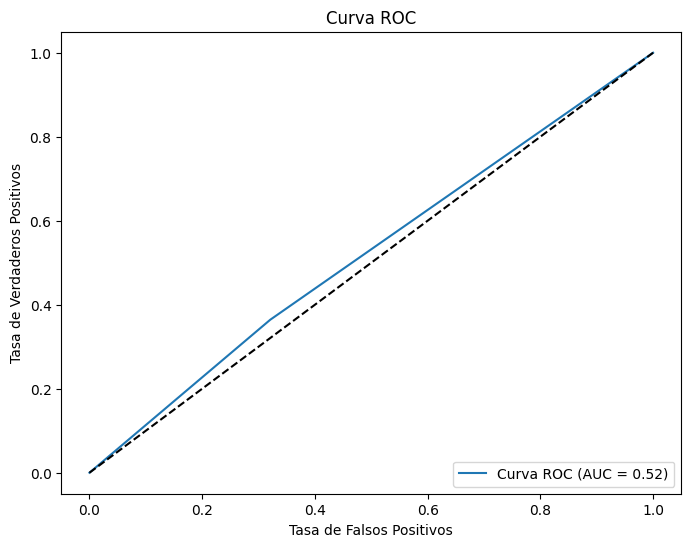

AUC: 0.5217448980413597


In [13]:
#Árboles de decisión
run_tree(X_train, X_test, y_train, y_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score: 0.8738541251494619
Train accuracy score: 0.9998991554266986
Test accuracy score: 0.8723404255319149


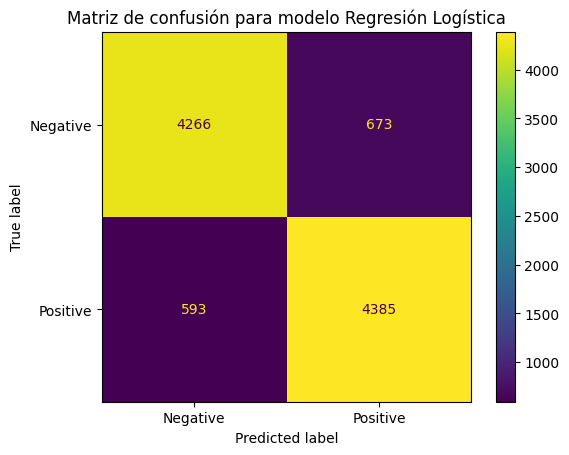

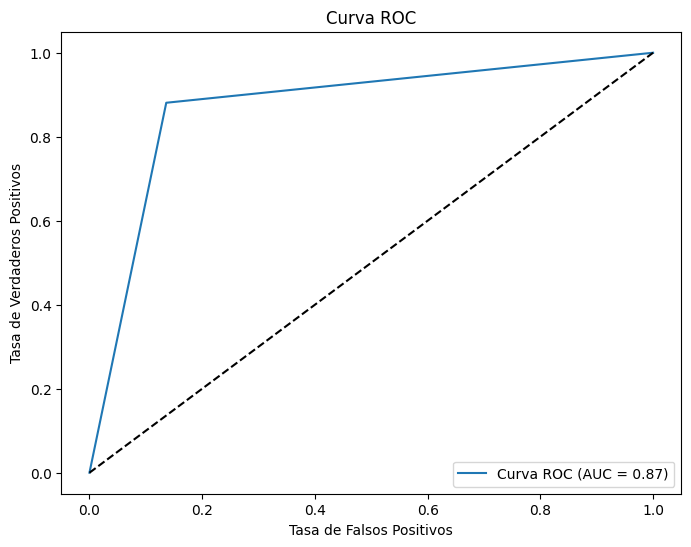

AUC: 0.8723067262303599


In [14]:
#Mejora para Regresión Logística usando Count Vectorizer

X = processed_imdb_df['review']
y = processed_imdb_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cv = CountVectorizer()

ctmTr = cv.fit_transform(X_train)

X_test_dtm = cv.transform(X_test)

run_lr_model(ctmTr, X_test_dtm, y_train, y_test, 'models/optimized_logreg_model.pkl')